# Exploratory Data Analysis 

- RGU ID - 2230890
- IIT ID - 20232167

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample


In [2]:
# fetching dataset fromt he uci reposotary
bank_marketing = fetch_ucirepo(id=222) 


  

In [3]:

bm_df = bank_marketing.data.original
data = bank_marketing.data.original

## Analysing Data set structure

In [4]:
bm_df.shape

(45211, 17)

In [5]:
bm_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
bm_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [7]:
bm_df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Handling missing values

In [8]:

bm_df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

- The categorical features seem to have missing values.
- we can explore the each categorical variable to further analize their compsition 

In [9]:
for col in ['job', 'education', 'contact', 'poutcome']:
    print(f"Value counts for {col}:")
    print(bm_df[col].value_counts(dropna=False))
    print() 

Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: count, dtype: int64

Value counts for education:
education
secondary    23202
tertiary     13301
primary       6851
NaN           1857
Name: count, dtype: int64

Value counts for contact:
contact
cellular     29285
NaN          13020
telephone     2906
Name: count, dtype: int64

Value counts for poutcome:
poutcome
NaN        36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64



- the miising values are for actually the unknow values mention in the dataset meta data

In [10]:
for col in ['job', 'education', 'contact', 'poutcome']:
    
    bm_df[col]=bm_df[col].fillna("unknown")

for col in ['job', 'education', 'contact', 'poutcome']:
    print(f"Value counts for {col}:")
    print(bm_df[col].value_counts(dropna=False))
    print() 

Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value counts for contact:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Value counts for poutcome:
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64



## Feature Relationships


### continoues data


#### 1. Age

In [11]:
print(bm_df.groupby('y')['age'].describe())


       count       mean        std   min   25%   50%   75%   max
y                                                               
no   39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0
yes   5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0


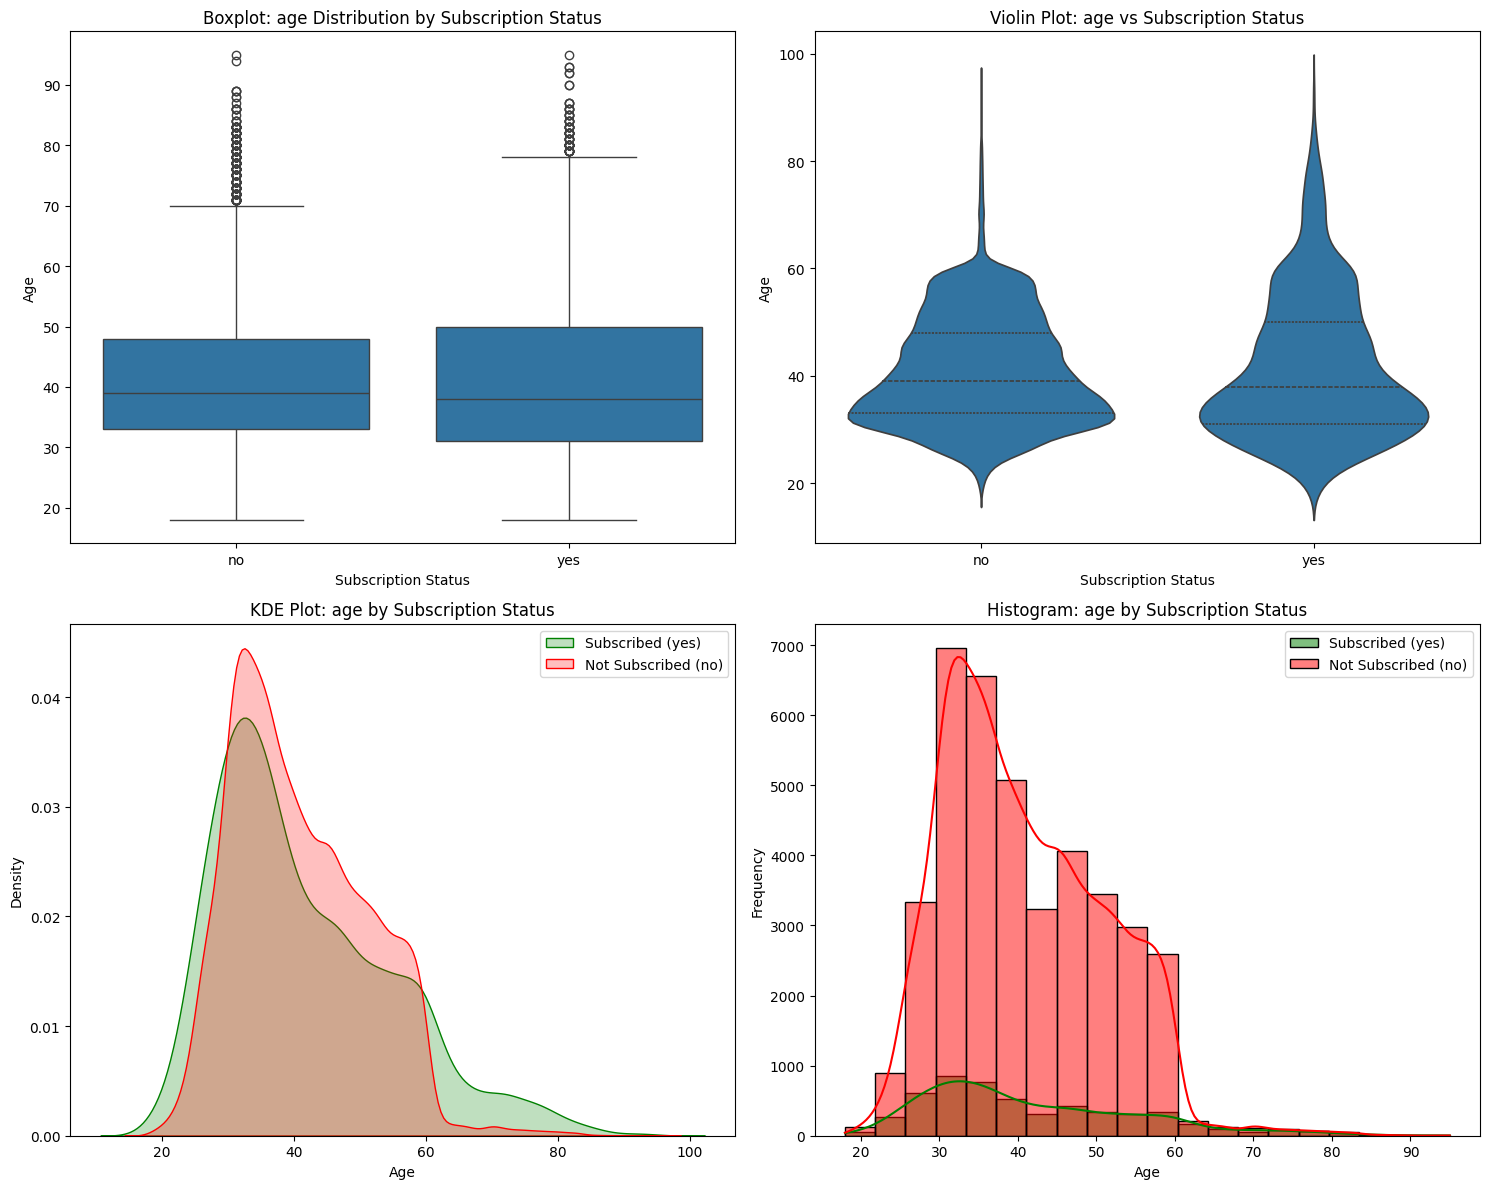

In [12]:


col = 'age' 

fig, axes = plt.subplots(2, 2, figsize=(15, 12))


sns.boxplot(data=bm_df, x='y', y=col, ax=axes[0, 0])
axes[0, 0].set_title(f"Boxplot: {col} Distribution by Subscription Status")
axes[0, 0].set_xlabel("Subscription Status")
axes[0, 0].set_ylabel(col.capitalize())

# Violin Plot
sns.violinplot(data=bm_df, x='y', y=col, inner="quartile", ax=axes[0, 1])
axes[0, 1].set_title(f"Violin Plot: {col} vs Subscription Status")
axes[0, 1].set_xlabel("Subscription Status")
axes[0, 1].set_ylabel(col.capitalize())

# KDE Plot
sns.kdeplot(bm_df.loc[bm_df['y'] == 'yes', col], label='Subscribed (yes)', fill=True, color="green", ax=axes[1, 0])
sns.kdeplot(bm_df.loc[bm_df['y'] == 'no', col], label='Not Subscribed (no)', fill=True, color="red", ax=axes[1, 0])
axes[1, 0].set_title(f"KDE Plot: {col} by Subscription Status")
axes[1, 0].set_xlabel(col.capitalize())
axes[1, 0].set_ylabel("Density")
axes[1, 0].legend()

# Histogram with different colors for the two classes
sns.histplot(bm_df[bm_df['y'] == 'yes'][col], color='green', label='Subscribed (yes)', kde=True, bins=20)
sns.histplot(bm_df[bm_df['y'] == 'no'][col], color='red', label='Not Subscribed (no)', kde=True, bins=20)
axes[1, 1].set_title(f"Histogram: {col} by Subscription Status")
axes[1, 1].set_xlabel(col.capitalize())
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#### 2. balance

In [13]:
bm_df.groupby('y')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,1303.714969,2974.195473,-8019.0,58.0,417.0,1345.0,102127.0
yes,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0


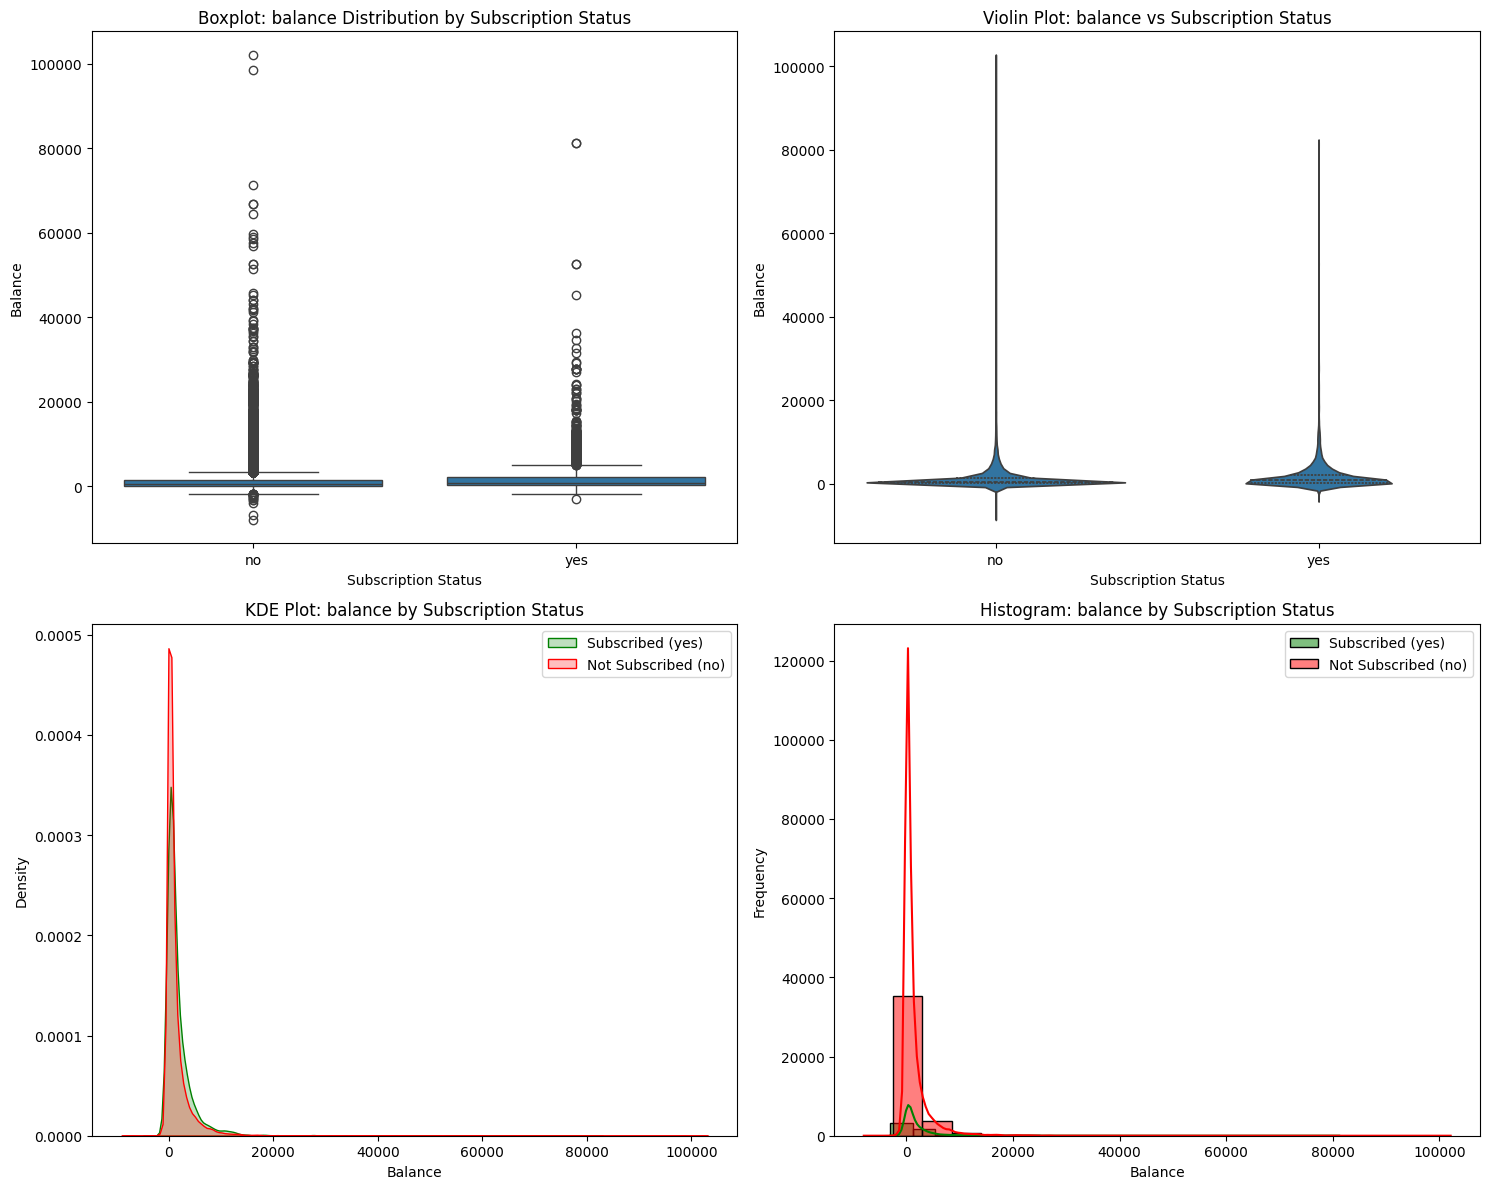

In [14]:

col = 'balance'  


fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot
sns.boxplot(data=bm_df, x='y', y=col, ax=axes[0, 0])
axes[0, 0].set_title(f"Boxplot: {col} Distribution by Subscription Status")
axes[0, 0].set_xlabel("Subscription Status")
axes[0, 0].set_ylabel(col.capitalize())

# Violin Plot
sns.violinplot(data=bm_df, x='y', y=col, inner="quartile", ax=axes[0, 1])
axes[0, 1].set_title(f"Violin Plot: {col} vs Subscription Status")
axes[0, 1].set_xlabel("Subscription Status")
axes[0, 1].set_ylabel(col.capitalize())

# KDE Plot
sns.kdeplot(bm_df.loc[bm_df['y'] == 'yes', col], label='Subscribed (yes)', fill=True, color="green", ax=axes[1, 0])
sns.kdeplot(bm_df.loc[bm_df['y'] == 'no', col], label='Not Subscribed (no)', fill=True, color="red", ax=axes[1, 0])
axes[1, 0].set_title(f"KDE Plot: {col} by Subscription Status")
axes[1, 0].set_xlabel(col.capitalize())
axes[1, 0].set_ylabel("Density")
axes[1, 0].legend()

# Histogram with different colors for the two classes
sns.histplot(bm_df[bm_df['y'] == 'yes'][col], color='green', label='Subscribed (yes)', kde=True, bins=20)
sns.histplot(bm_df[bm_df['y'] == 'no'][col], color='red', label='Not Subscribed (no)', kde=True, bins=20)
axes[1, 1].set_title(f"Histogram: {col} by Subscription Status")
axes[1, 1].set_xlabel(col.capitalize())
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


- there are ouliers present in the dataset
- could do something like Winsorization  to cut off the outliers
- outliers on the lower values (people who are in debt) seem less likley to subscribe
- winsorizing could potentially loose that data
- could turn the colum in to categorical data where I can represent in debpt and not in debt

#### 3. day_of_week



In [15]:
bm_df.groupby('y')['day_of_week'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,15.892290,8.294728,1.0,8.0,16.0,21.0,31.0
yes,5289.0,15.158253,8.501875,1.0,8.0,15.0,22.0,31.0


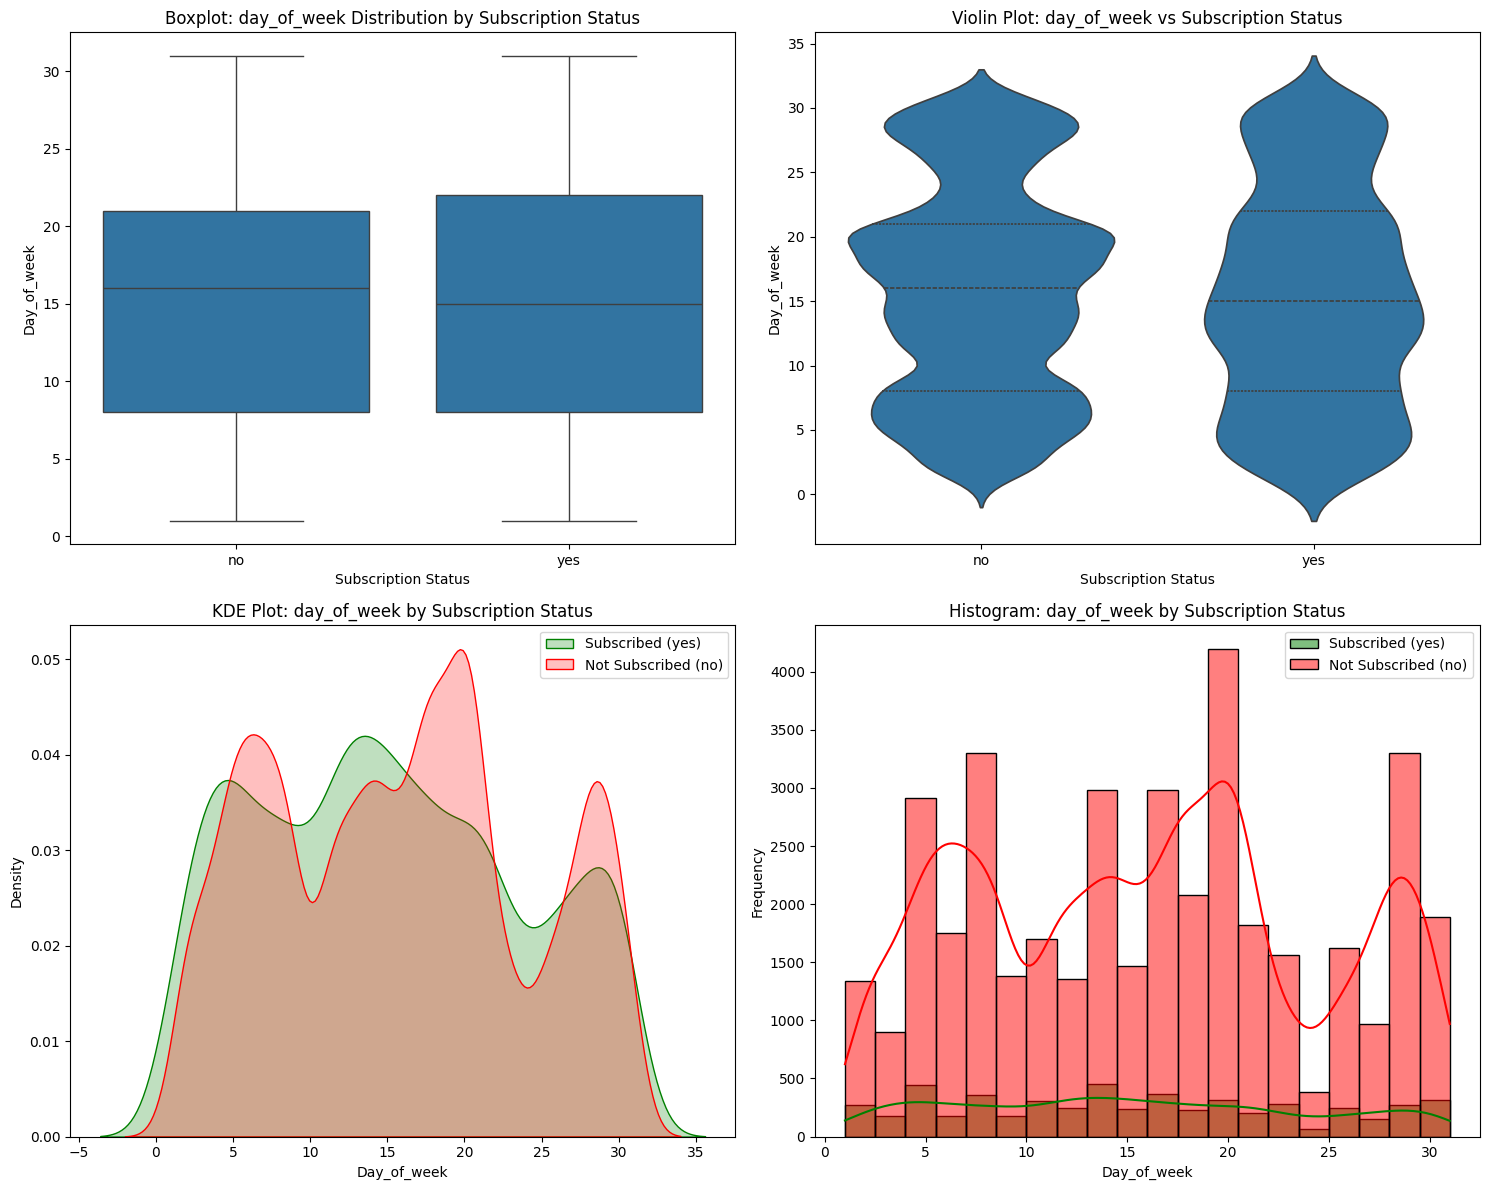

In [16]:

col = 'day_of_week'  

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot
sns.boxplot(data=bm_df, x='y', y=col, ax=axes[0, 0])
axes[0, 0].set_title(f"Boxplot: {col} Distribution by Subscription Status")
axes[0, 0].set_xlabel("Subscription Status")
axes[0, 0].set_ylabel(col.capitalize())

# Violin Plot
sns.violinplot(data=bm_df, x='y', y=col, inner="quartile", ax=axes[0, 1])
axes[0, 1].set_title(f"Violin Plot: {col} vs Subscription Status")
axes[0, 1].set_xlabel("Subscription Status")
axes[0, 1].set_ylabel(col.capitalize())

# KDE Plot
sns.kdeplot(bm_df.loc[bm_df['y'] == 'yes', col], label='Subscribed (yes)', fill=True, color="green", ax=axes[1, 0])
sns.kdeplot(bm_df.loc[bm_df['y'] == 'no', col], label='Not Subscribed (no)', fill=True, color="red", ax=axes[1, 0])
axes[1, 0].set_title(f"KDE Plot: {col} by Subscription Status")
axes[1, 0].set_xlabel(col.capitalize())
axes[1, 0].set_ylabel("Density")
axes[1, 0].legend()

# Histogram with different colors for the two classes
sns.histplot(bm_df[bm_df['y'] == 'yes'][col], color='green', label='Subscribed (yes)', kde=True, bins=20)
sns.histplot(bm_df[bm_df['y'] == 'no'][col], color='red', label='Not Subscribed (no)', kde=True, bins=20)
axes[1, 1].set_title(f"Histogram: {col} by Subscription Status")
axes[1, 1].set_xlabel(col.capitalize())
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### 4. Duration


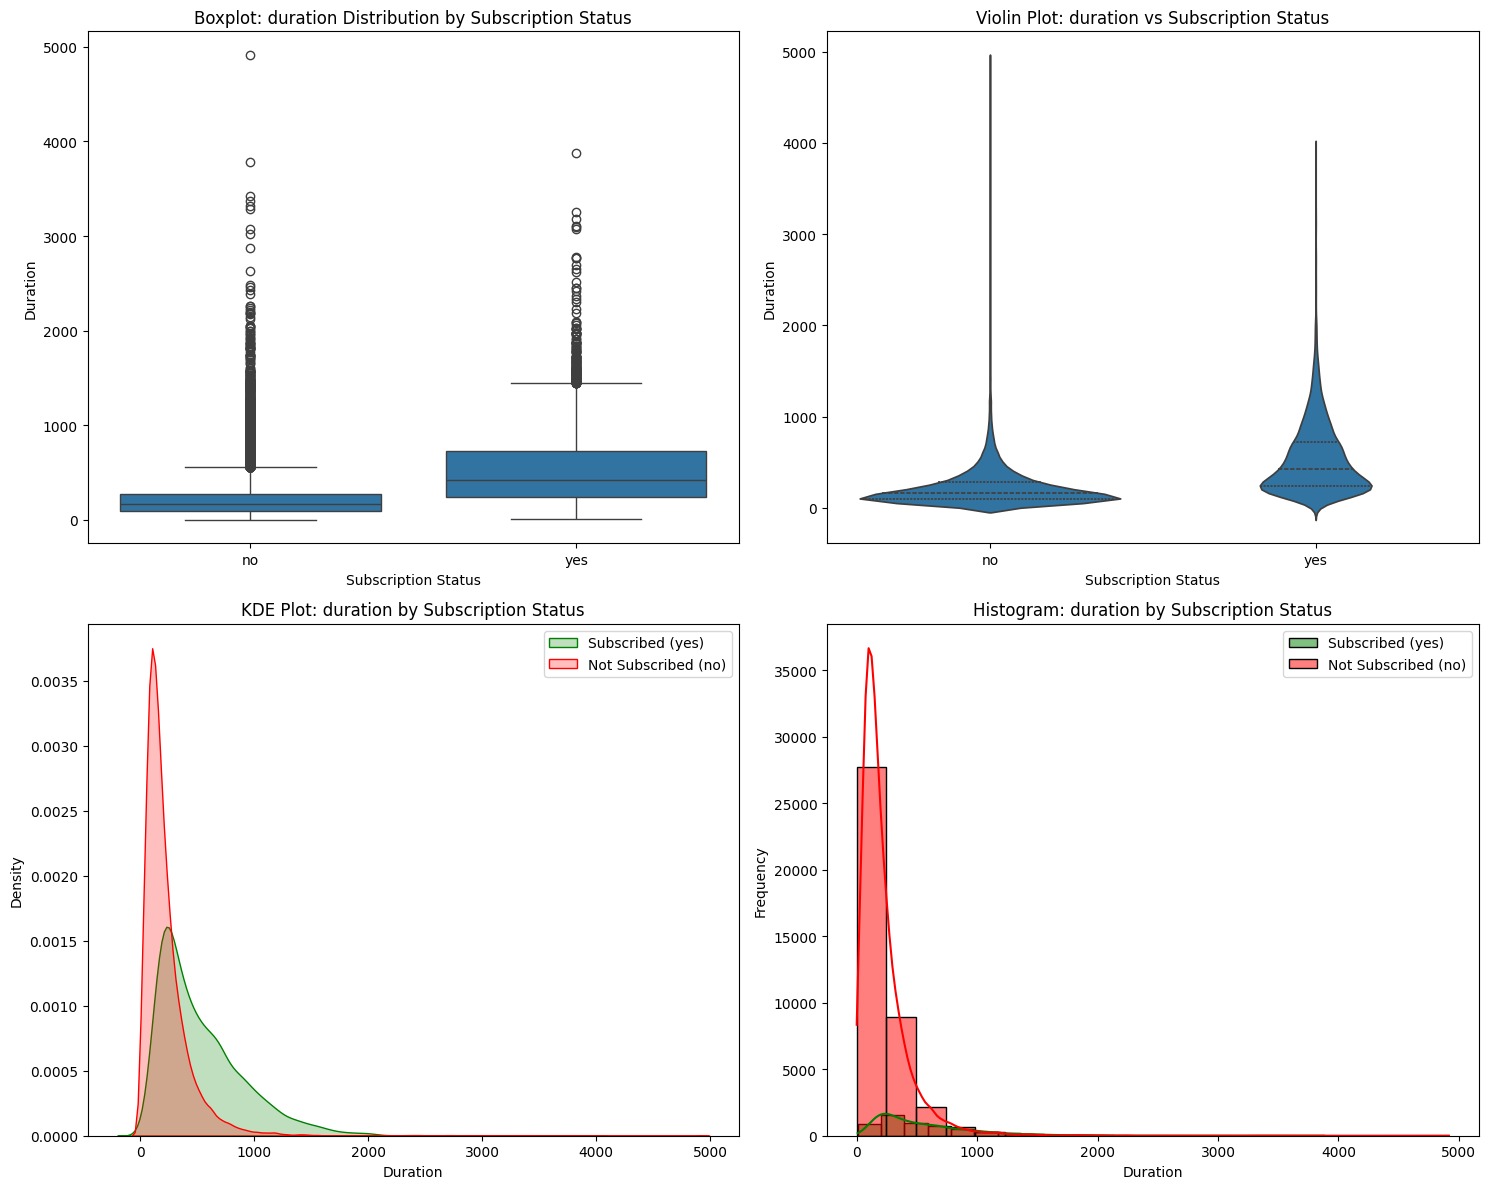

In [17]:
col = 'duration'  

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot
sns.boxplot(data=bm_df, x='y', y=col, ax=axes[0, 0])
axes[0, 0].set_title(f"Boxplot: {col} Distribution by Subscription Status")
axes[0, 0].set_xlabel("Subscription Status")
axes[0, 0].set_ylabel(col.capitalize())

# Violin Plot
sns.violinplot(data=bm_df, x='y', y=col, inner="quartile", ax=axes[0, 1])
axes[0, 1].set_title(f"Violin Plot: {col} vs Subscription Status")
axes[0, 1].set_xlabel("Subscription Status")
axes[0, 1].set_ylabel(col.capitalize())

# KDE Plot
sns.kdeplot(bm_df.loc[bm_df['y'] == 'yes', col], label='Subscribed (yes)', fill=True, color="green", ax=axes[1, 0])
sns.kdeplot(bm_df.loc[bm_df['y'] == 'no', col], label='Not Subscribed (no)', fill=True, color="red", ax=axes[1, 0])
axes[1, 0].set_title(f"KDE Plot: {col} by Subscription Status")
axes[1, 0].set_xlabel(col.capitalize())
axes[1, 0].set_ylabel("Density")
axes[1, 0].legend()

# Histogram with different colors for the two classes
sns.histplot(bm_df[bm_df['y'] == 'yes'][col], color='green', label='Subscribed (yes)', kde=True, bins=20)
sns.histplot(bm_df[bm_df['y'] == 'no'][col], color='red', label='Not Subscribed (no)', kde=True, bins=20)
axes[1, 1].set_title(f"Histogram: {col} by Subscription Status")
axes[1, 1].set_xlabel(col.capitalize())
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### 5 .campaign 

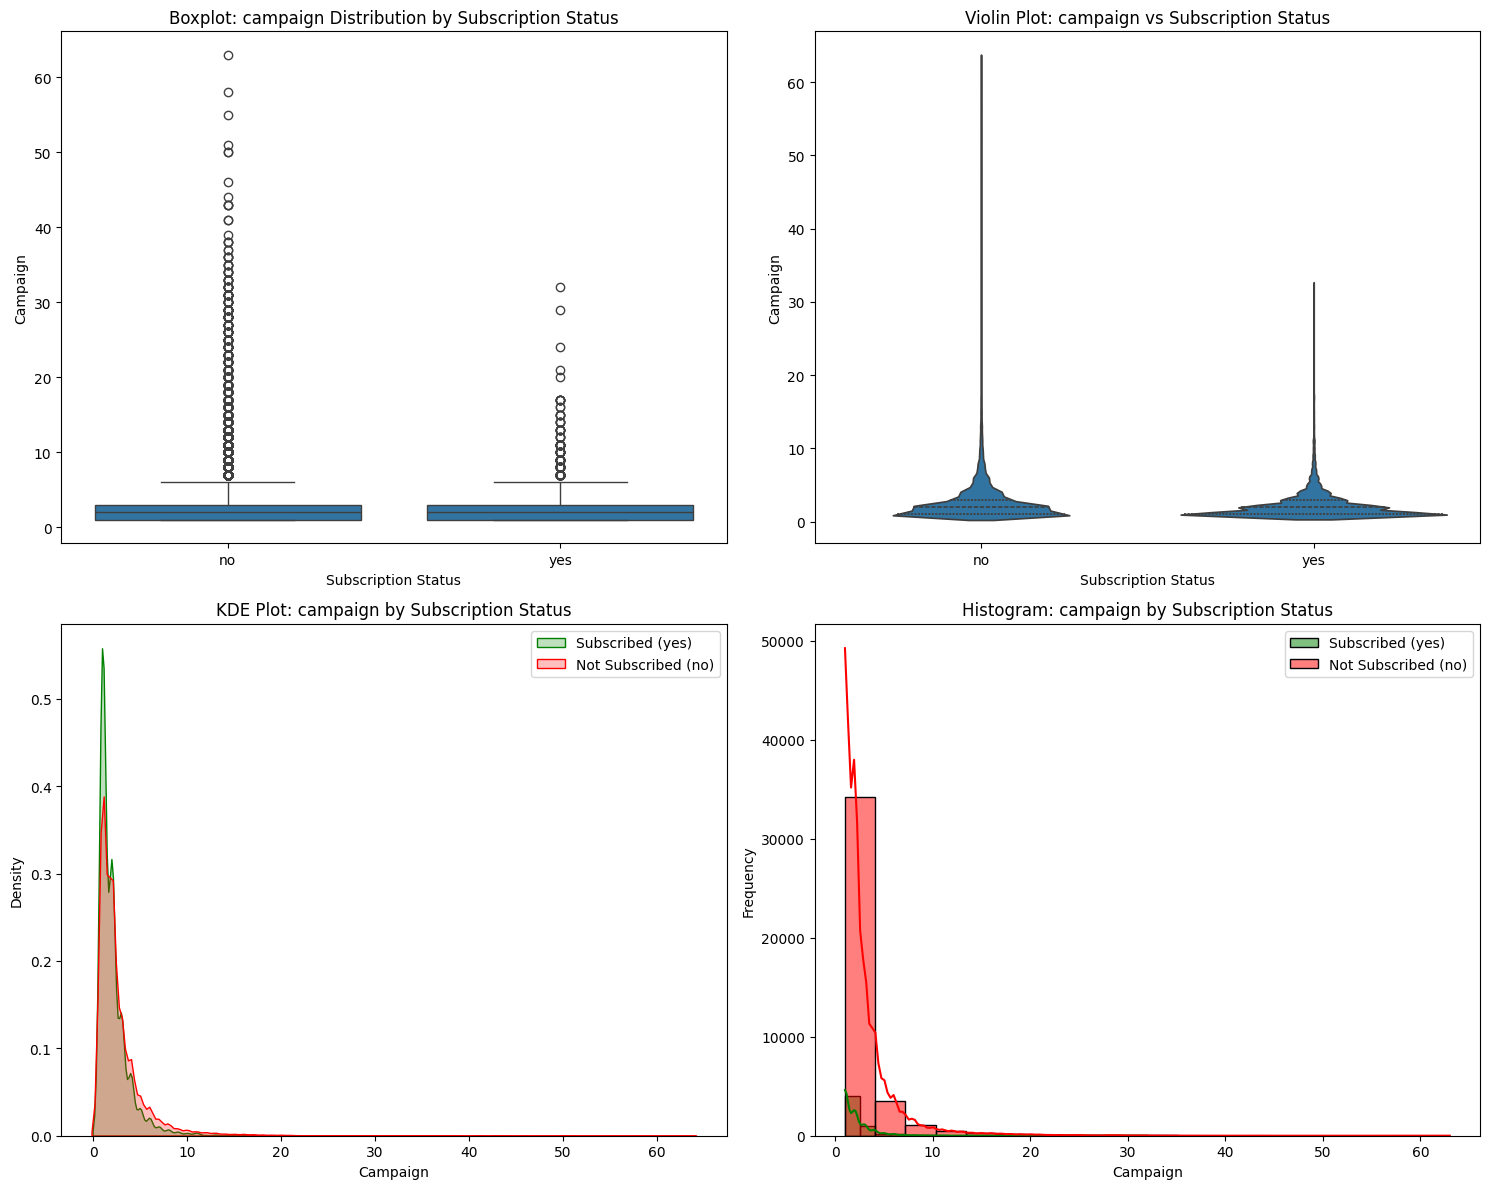

In [18]:
col = 'campaign'  

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot
sns.boxplot(data=bm_df, x='y', y=col, ax=axes[0, 0])
axes[0, 0].set_title(f"Boxplot: {col} Distribution by Subscription Status")
axes[0, 0].set_xlabel("Subscription Status")
axes[0, 0].set_ylabel(col.capitalize())

# Violin Plot
sns.violinplot(data=bm_df, x='y', y=col, inner="quartile", ax=axes[0, 1])
axes[0, 1].set_title(f"Violin Plot: {col} vs Subscription Status")
axes[0, 1].set_xlabel("Subscription Status")
axes[0, 1].set_ylabel(col.capitalize())

# KDE Plot
sns.kdeplot(bm_df.loc[bm_df['y'] == 'yes', col], label='Subscribed (yes)', fill=True, color="green", ax=axes[1, 0])
sns.kdeplot(bm_df.loc[bm_df['y'] == 'no', col], label='Not Subscribed (no)', fill=True, color="red", ax=axes[1, 0])
axes[1, 0].set_title(f"KDE Plot: {col} by Subscription Status")
axes[1, 0].set_xlabel(col.capitalize())
axes[1, 0].set_ylabel("Density")
axes[1, 0].legend()

# Histogram with different colors for the two classes
sns.histplot(bm_df[bm_df['y'] == 'yes'][col], color='green', label='Subscribed (yes)', kde=True, bins=20)
sns.histplot(bm_df[bm_df['y'] == 'no'][col], color='red', label='Not Subscribed (no)', kde=True, bins=20)
axes[1, 1].set_title(f"Histogram: {col} by Subscription Status")
axes[1, 1].set_xlabel(col.capitalize())
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### 6. pdays

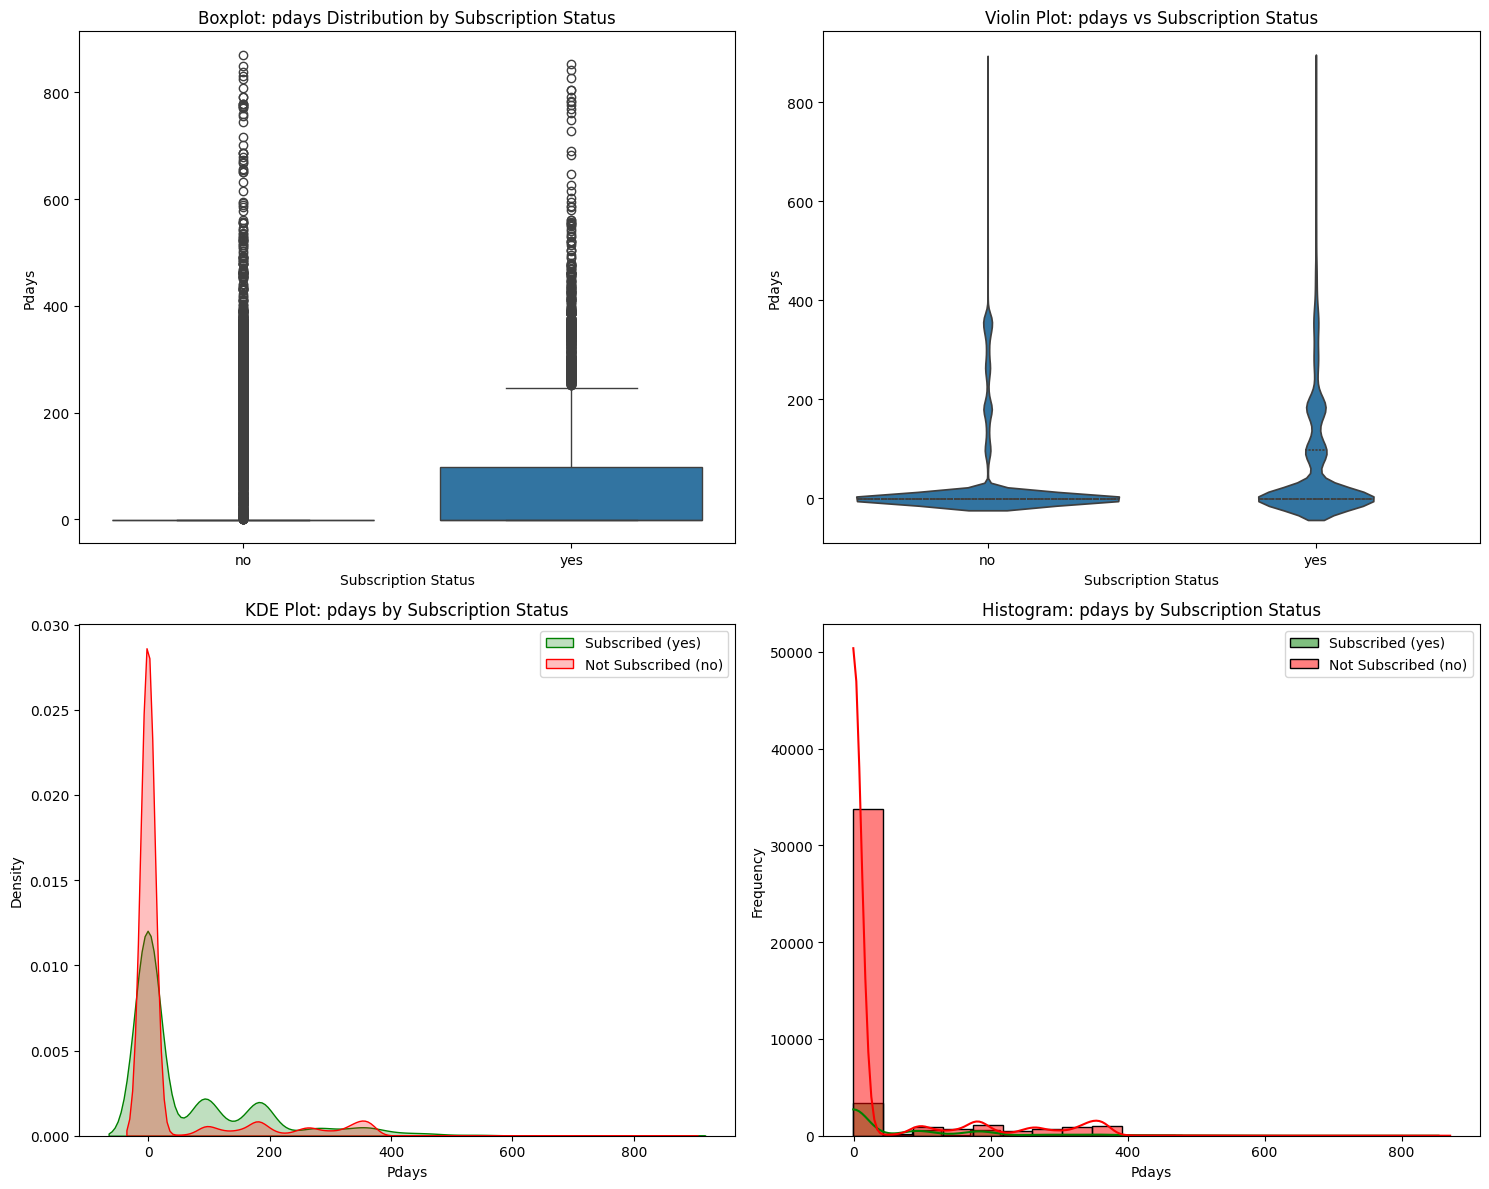

In [19]:
col = 'pdays'  

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot
sns.boxplot(data=bm_df, x='y', y=col, ax=axes[0, 0])
axes[0, 0].set_title(f"Boxplot: {col} Distribution by Subscription Status")
axes[0, 0].set_xlabel("Subscription Status")
axes[0, 0].set_ylabel(col.capitalize())

# Violin Plot
sns.violinplot(data=bm_df, x='y', y=col, inner="quartile", ax=axes[0, 1])
axes[0, 1].set_title(f"Violin Plot: {col} vs Subscription Status")
axes[0, 1].set_xlabel("Subscription Status")
axes[0, 1].set_ylabel(col.capitalize())

# KDE Plot
sns.kdeplot(bm_df.loc[bm_df['y'] == 'yes', col], label='Subscribed (yes)', fill=True, color="green", ax=axes[1, 0])
sns.kdeplot(bm_df.loc[bm_df['y'] == 'no', col], label='Not Subscribed (no)', fill=True, color="red", ax=axes[1, 0])
axes[1, 0].set_title(f"KDE Plot: {col} by Subscription Status")
axes[1, 0].set_xlabel(col.capitalize())
axes[1, 0].set_ylabel("Density")
axes[1, 0].legend()

# Histogram with different colors for the two classes
sns.histplot(bm_df[bm_df['y'] == 'yes'][col], color='green', label='Subscribed (yes)', kde=True, bins=20)
sns.histplot(bm_df[bm_df['y'] == 'no'][col], color='red', label='Not Subscribed (no)', kde=True, bins=20)
axes[1, 1].set_title(f"Histogram: {col} by Subscription Status")
axes[1, 1].set_xlabel(col.capitalize())
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### 7. previous

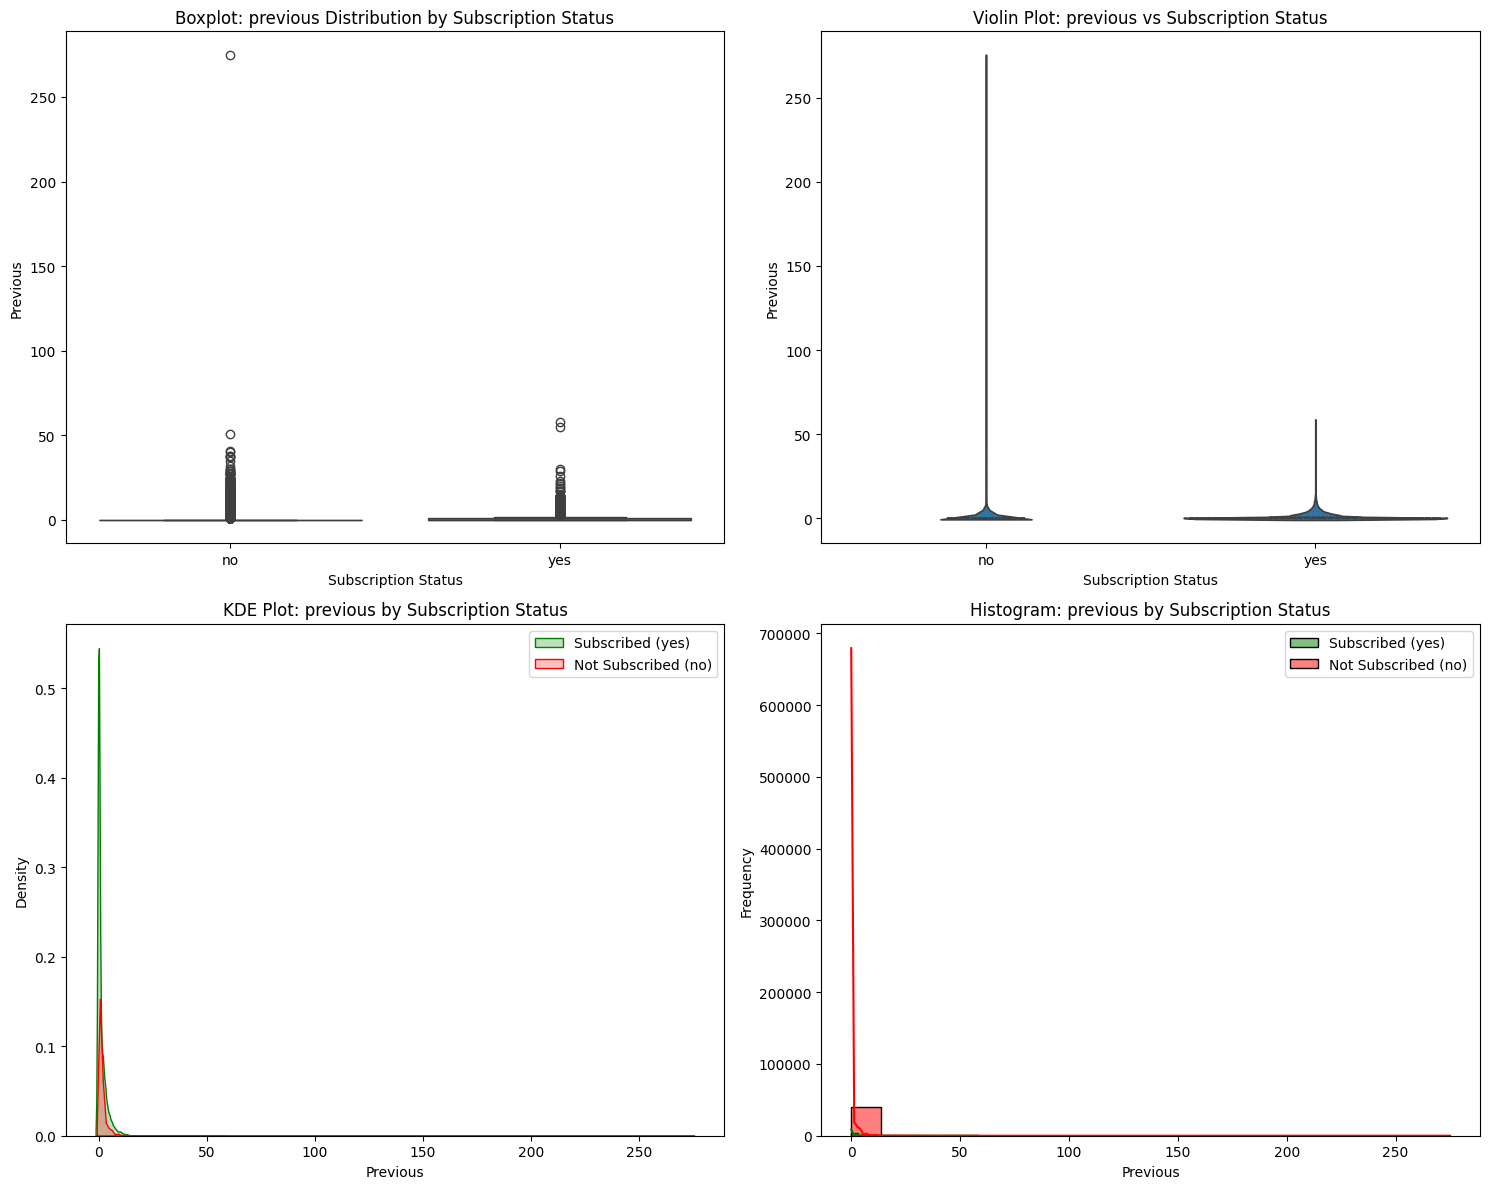

In [20]:
col = 'previous'  

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot
sns.boxplot(data=bm_df, x='y', y=col, ax=axes[0, 0])
axes[0, 0].set_title(f"Boxplot: {col} Distribution by Subscription Status")
axes[0, 0].set_xlabel("Subscription Status")
axes[0, 0].set_ylabel(col.capitalize())

# Violin Plot
sns.violinplot(data=bm_df, x='y', y=col, inner="quartile", ax=axes[0, 1])
axes[0, 1].set_title(f"Violin Plot: {col} vs Subscription Status")
axes[0, 1].set_xlabel("Subscription Status")
axes[0, 1].set_ylabel(col.capitalize())

# KDE Plot
sns.kdeplot(bm_df.loc[bm_df['y'] == 'yes', col], label='Subscribed (yes)', fill=True, color="green", ax=axes[1, 0])
sns.kdeplot(bm_df.loc[bm_df['y'] == 'no', col], label='Not Subscribed (no)', fill=True, color="red", ax=axes[1, 0])
axes[1, 0].set_title(f"KDE Plot: {col} by Subscription Status")
axes[1, 0].set_xlabel(col.capitalize())
axes[1, 0].set_ylabel("Density")
axes[1, 0].legend()

# Histogram with different colors for the two classes
sns.histplot(bm_df[bm_df['y'] == 'yes'][col], color='green', label='Subscribed (yes)', kde=True, bins=20)
sns.histplot(bm_df[bm_df['y'] == 'no'][col], color='red', label='Not Subscribed (no)', kde=True, bins=20)
axes[1, 1].set_title(f"Histogram: {col} by Subscription Status")
axes[1, 1].set_xlabel(col.capitalize())
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Binary data

#### Binary data analysis 

There are three binary variables

1. defult - has defulted to credit (borrower fails to meet their debt obligations) 
2. housing - has housing loan
3. loan - has personl loan

In [21]:
binary_vars = ['default', 'housing', 'loan']

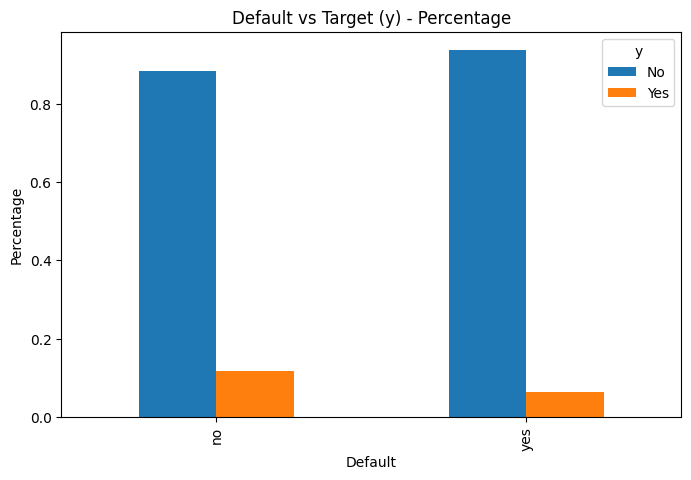

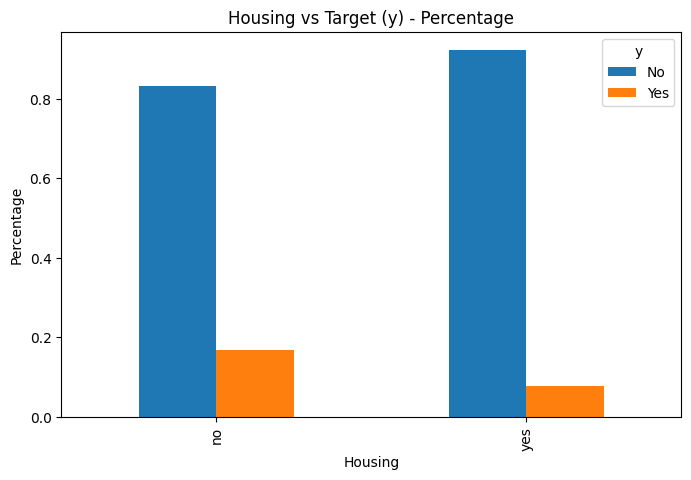

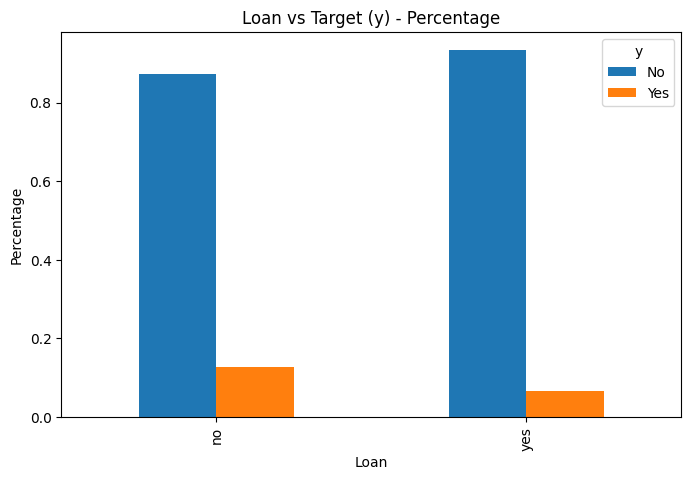

In [22]:
# Grouped bar plot to show percentage distribution
for var in binary_vars:
    cross_tab = pd.crosstab(bm_df[var], bm_df['y'], normalize='index')  # Normalize by rows
    cross_tab.plot(kind='bar', figsize=(8, 5), color=['#1f77b4', '#ff7f0e'])
    plt.title(f'{var.capitalize()} vs Target (y) - Percentage')
    plt.xlabel(var.capitalize())
    plt.ylabel('Percentage')
    plt.legend(title='y', labels=['No', 'Yes'])
    plt.show()


In [23]:
binary_cols = ['default', 'housing', 'loan', 'y']
for col in binary_cols:
    bm_df[col] = bm_df[col].map({'yes': 1, 'no': 0})

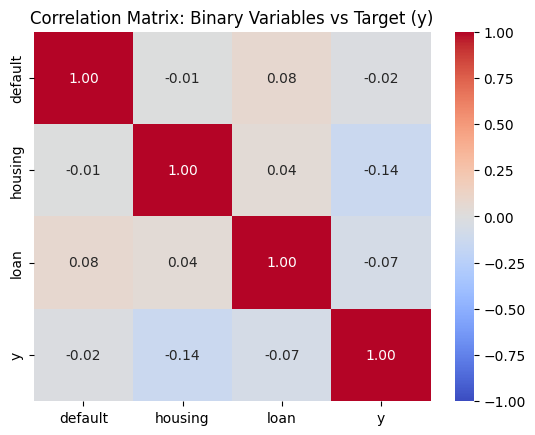

In [24]:
# Compute correlation for binary variables and the target
binary_vars_with_target = binary_vars + ['y']
corr = bm_df[binary_vars_with_target].corr()

# Visualize as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Binary Variables vs Target (y)')
plt.show()


all 3 binary variables has weak negative coreation with the target variable.



#### Binary encoding 

In [25]:
bm_df[binary_cols]

,default,housing,loan,y
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,0,1
45209,0,0,0,0


### Categorical Data

#### Categorical data analysis 

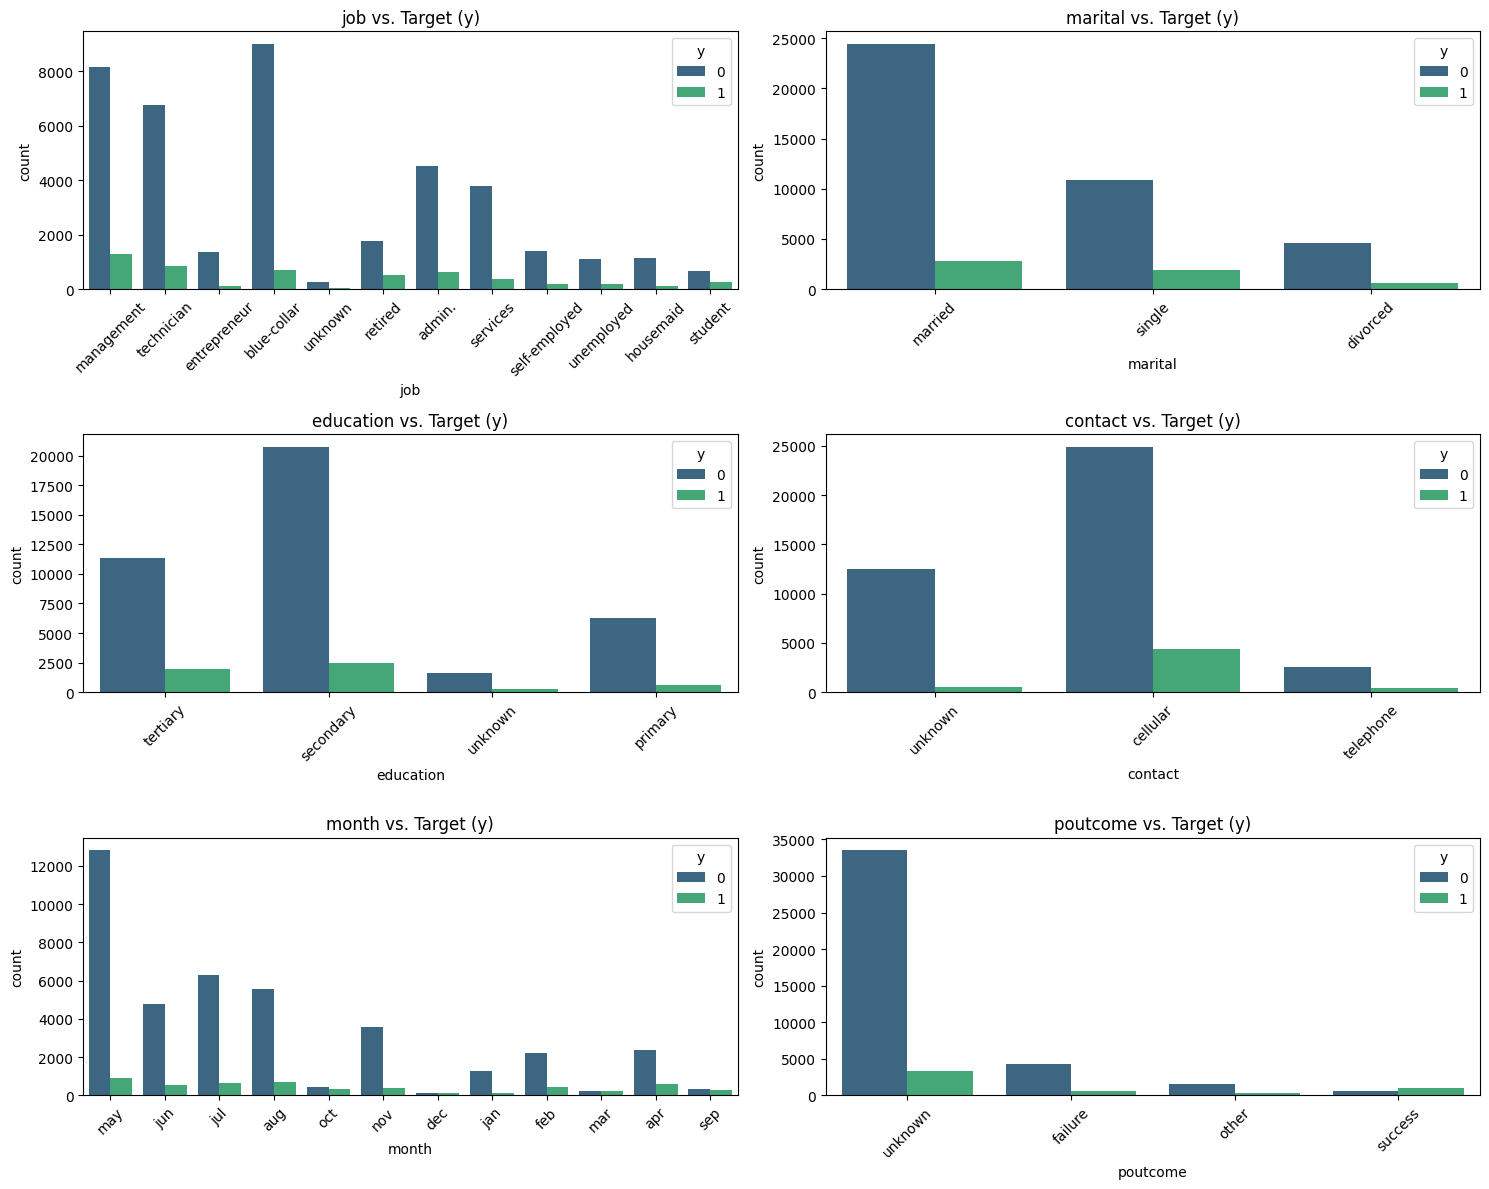

In [26]:
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Set up the plotting space
plt.figure(figsize=(15, 12))

# Loop through each categorical column and create a grouped bar plot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns layout
    sns.countplot(data=bm_df, x=col, hue='y', palette="viridis")  # Group by target 'y'
    plt.title(f'{col} vs. Target (y)')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Show the plots
plt.show()

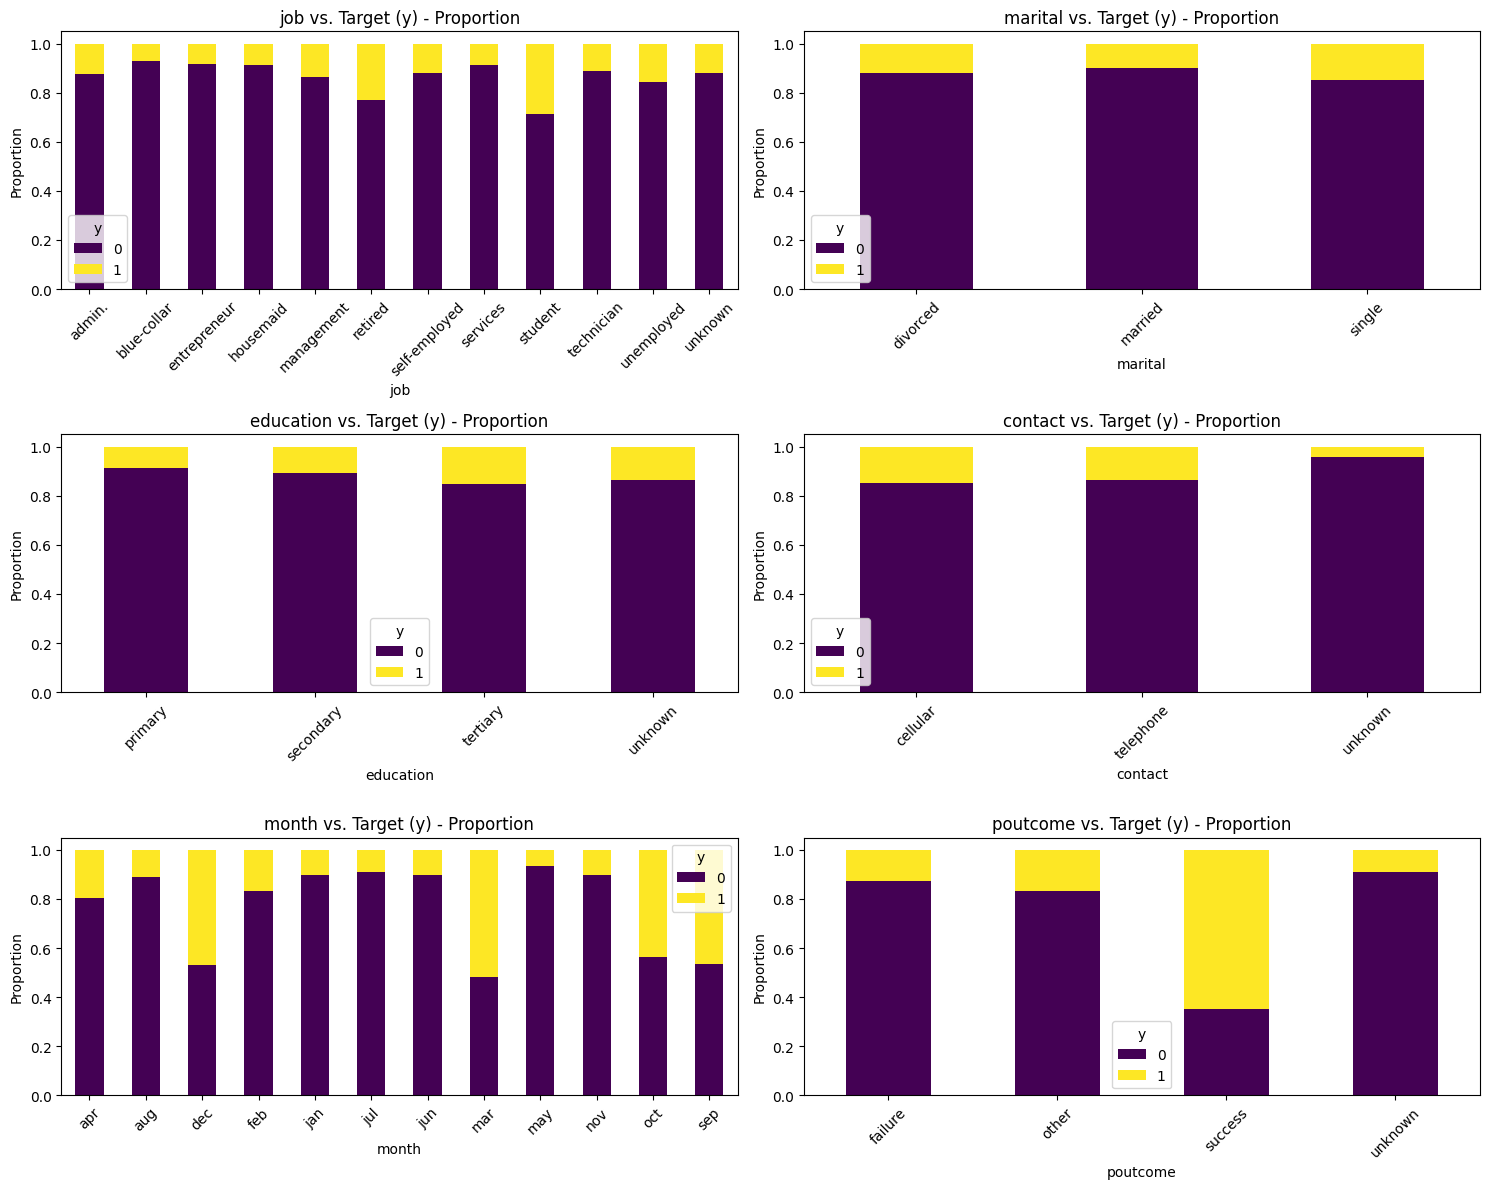

In [27]:
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Set up the plotting space
plt.figure(figsize=(15, 12))

# Loop through each categorical column
for i, col in enumerate(categorical_columns, 1):
    # Calculate proportions within each category for 'yes' and 'no'
    prop_df = bm_df.groupby([col, 'y']).size().unstack(fill_value=0)
    prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)  # Normalize to proportions
    
    # Plot
    plt.subplot(3, 2, i)  # 3 rows, 2 columns layout
    prop_df.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
    
    plt.title(f'{col} vs. Target (y) - Proportion')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Show the plots
plt.show()

#### Categorical data encoding

In [28]:
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
bm_df = pd.get_dummies(bm_df, columns=categorical_cols, drop_first=True)

In [29]:
bm_df.shape

(45211, 43)

## pleminary testing for Random forest

In [30]:
X = bm_df.drop(['y','duration'], axis=1)
y = bm_df['y']

In [31]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_train.value_counts()

y
0    31937
1     4231
Name: count, dtype: int64

In [32]:


# Handle class imbalance using bagging (undersample majority class)
def balanced_bagging(X, y, n_estimators=10):
    models = []
    for _ in range(n_estimators):
        # Combine X and y
        data = pd.concat([X, y], axis=1)

        # Separate majority and minority classes
        majority = data[data['y'] == 0]
        minority = data[data['y'] == 1]

        # Undersample majority class
        majority_downsampled = resample(
            majority,
            replace=False,
            n_samples=len(minority),  # Match minority class size
            random_state=np.random.randint(1000)
        )

        # Combine undersampled majority with minority
        balanced_data = pd.concat([majority_downsampled, minority])
                

        # Separate features and target
        X_balanced = balanced_data.drop('y', axis=1)
        y_balanced = balanced_data['y']
        

        # Train a random forest model on balanced data
        model = RandomForestClassifier(random_state=42)
        model.fit(X_balanced, y_balanced)
        
        models.append(model)
        

    return models

# Train models using balanced bagging
models = balanced_bagging(X_train, y_train, n_estimators=10)




In [33]:
# Predict with an ensemble approach
def predict_with_bagging(models, X):
    predictions = np.zeros((len(X), len(models)))
    for i, model in enumerate(models):
        predictions[:, i] = model.predict(X)
    # Use majority voting
    final_predictions = np.round(np.mean(predictions, axis=1))
    return final_predictions

# Evaluate on test data
y_pred = predict_with_bagging(models, X_test)

In [34]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[6472 1513]
 [ 355  703]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      7985
           1       0.32      0.66      0.43      1058

    accuracy                           0.79      9043
   macro avg       0.63      0.74      0.65      9043
weighted avg       0.87      0.79      0.82      9043



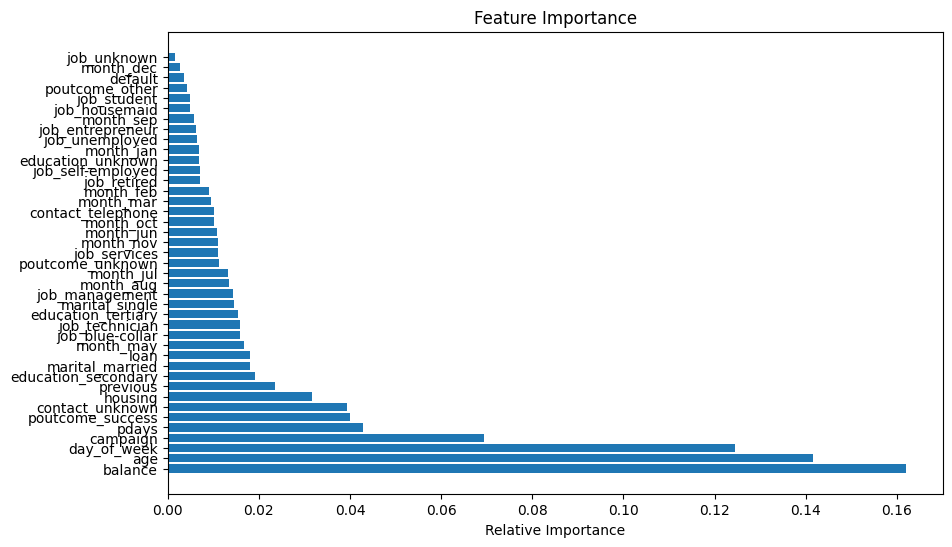

In [35]:
importances = np.mean([model.feature_importances_ for model in models], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Relative Importance")
plt.show()


## hyper parameter tuning

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold


# Updated balanced bagging with hyperparameter options
def balanced_bagging(X, y, n_estimators=10, rf_params=None):
    models = []
    for _ in range(n_estimators):
        # Combine X and y
        data = pd.concat([X, y], axis=1)

        # Separate majority and minority classes
        majority = data[data['y'] == 0]
        minority = data[data['y'] == 1]

        # Undersample majority class
        majority_downsampled = resample(
            majority,
            replace=False,
            n_samples=len(minority),  # Match minority class size
            random_state=np.random.randint(1000)
        )

        # Combine undersampled majority with minority
        balanced_data = pd.concat([majority_downsampled, minority])

        # Separate features and target
        X_balanced = balanced_data.drop('y', axis=1)
        y_balanced = balanced_data['y']

        # Train a random forest model on balanced data
        rf_params = rf_params or {}
        model = RandomForestClassifier(random_state=42, **rf_params)
        model.fit(X_balanced, y_balanced)
        models.append(model)

    return models


In [37]:
# Cross-validation evaluation
def cross_validate_bagging(X, y, cv=5, n_estimators=10, rf_params=None):
    fold_scores = []

    for train_idx, test_idx in StratifiedKFold(n_splits=cv, shuffle=True, random_state=42).split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        models = balanced_bagging(X_train, y_train, n_estimators=n_estimators, rf_params=rf_params)
        y_pred = predict_with_bagging(models, X_test)

        # Compute F1 score (or any metric of choice)
        fold_scores.append(f1_score(y_test, y_pred))

    return np.mean(fold_scores), np.std(fold_scores)


In [38]:
# Hyperparameter tuning for balanced bagging
def grid_search_bagging(X, y, param_grid, n_estimators=10, cv=3):
    from itertools import product  # For generating all combinations

    best_params = None
    best_score = -np.inf

    # Iterate through each dictionary in param_grid
    for grid in param_grid:
        keys, values = zip(*grid.items())
        # Generate all combinations of parameters
        for combination in product(*values):
            params = dict(zip(keys, combination))
            print(f"Testing parameters: {params}")

            # Cross-validate using the current parameter combination
            mean_score, std_score = cross_validate_bagging(X, y, cv=cv, n_estimators=n_estimators, rf_params=params)

            print(f"Mean F1 Score: {mean_score:.4f} (+/- {std_score:.4f})")
            if mean_score > best_score:
                best_score = mean_score
                best_params = params

    return best_params, best_score


In [39]:
# # Parameter grid for RandomForestClassifier
# param_grid = [
#     {'n_estimators': [5,10,20,25,30,35,40,45,50,55,60,65,70], 'max_depth': [None, 5,10, 15,20], 'min_samples_split': [2, 5]}
    
# ]

# # Perform grid search
# best_params, best_score = grid_search_bagging(X_train, y_train, param_grid, n_estimators=10, cv=3)

# print("Best Parameters:", best_params)
# print("Best Cross-Validated Score:", best_score)

# # Train final models with best hyperparameters
# final_models = balanced_bagging(X_train, y_train, n_estimators=10, rf_params=best_params)
# y_pred = predict_with_bagging(final_models, X_test)

# print("Final Model Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("\nFinal Model Classification Report:")
# print(classification_report(y_test, y_pred))